# Momento de Retroalimentación
#### *Módulo 2*
---
David Emiliano Mireles Cárdenas

## Introducción

El Dataset *Statlog (German Credit Data)* fue donado a la Universidad de California en 1994 por el profesor Hans Hoffman. Contiene mil filas y 21 columnas, veinte de ellas corresponden a atributos y la última corresponde a la columna *target*.

El objetivo de este dataset es predecir la última columna, que determina si el cliente de un banco es un buen o mal candidato para obtener un crédito. En este caso en particular es preferible catalogar a alguien aceptable para recibir un crédito como inaceptable, en lugar de catalogar a alguien inaceptable como aceptable. Es decir, el banco prefiere rechazar una soliticud de crédito a alguien que sería bueno manejandolos sobre otorgar el crédito a alguien que sería malo manejandolo. Es por esto que este dataset viene con una matriz de costo que se pide utilizar:

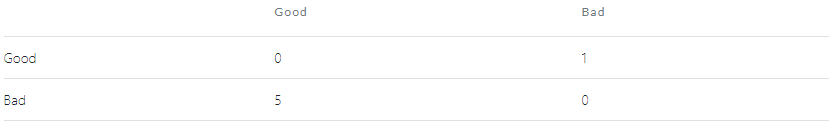

La fuente es el [sitio de Machine Learning de UC Irvine](http://archive.ics.uci.edu/dataset/144/statlog+german+credit+data).

## Preparación

### Importar librerías necesarias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

### Cargar datos

Conectar con Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importar datos

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Statlog German Credit Data/german.data',
                 header = None, # no hay header row
                 sep = ' ') # se usan espacios en lugar de comas

A continuación la descripción de los datos obtenida del sitio oficial de UC Irvine.

>**Attribute 1: (qualitative)**  
***Status of existing checking account***  
- **A11:** ... <    0 DM
- **A12:** 0 <= ... <  200 DM
- **A13:** ... >= 200 DM / salary assignments for at least 1 year
- **A14:** no checking account
>
>**Attribute 2: (numerical)**  
***Duration in month***
>
>**Attribute 3: (qualitative)**  
***Credit history***  
- **A30:** no credits taken/ all credits paid back duly
- **A31:** all credits at this bank paid back duly
- **A32:** existing credits paid back duly till now
- **A33:** delay in paying off in the past
- **A34:** critical account/ other credits existing (not at this bank)
>
>**Attribute 4: (qualitative)**  
***Purpose***  
- **A40:** car (new)
- **A41:** car (used)
- **A42:** furniture/equipment
- **A43:** radio/television
- **A44:** domestic appliances
- **A45:** repairs
- **A46:** education
- **A47:** (vacation - does not exist?)
- **A48:** retraining
- **A49:** business
- **A410:** others
>
>**Attribute 5: (numerical)**  
***Credit amount***
>
>**Attribute 6: (qualitative)**  
***Savings account/bonds***  
- **A61:** ... <  100 DM
- **A62:** 100 <= ... <  500 DM
- **A63:** 500 <= ... < 1000 DM
- **A64:** ... >= 1000 DM
- **A65:** unknown/ no savings account
>
>**Attribute 7: (qualitative)**  
***Present employment since***  
- **A71:** unemployed
- **A72:** ... < 1 year
- **A73:** 1  <= ... < 4 years  
- **A74:** 4  <= ... < 7 years
- **A75:** ... >= 7 years
>
>**Attribute 8: (numerical)**  
***Installment rate in percentage of disposable income***
>
>**Attribute 9: (qualitative)**  
***Personal status and sex***  
- **A91:** male   : divorced/separated
- **A92:** female : divorced/separated/married
- **A93:** male   : single
- **A94:** male   : married/widowed
- **A95:** female : single
>
>**Attribute 10: (qualitative)**  
***Other debtors / guarantors***  
- **A101:** none
- **A102:** co-applicant
- **A103:** guarantor
>
>**Attribute 11: (numerical)**  
***Present residence since***
>
>**Attribute 12: (qualitative)**  
***Property***  
- **A121:** real estate
- **A122:** if not A121 : building society savings agreement/ life insurance
- **A123:** if not A121/A122 : car or other, not in attribute 6
- **A124:** unknown / no property
>
>**Attribute 13: (numerical)**  
***Age in years***
>
>**Attribute 14: (qualitative)**  
***Other installment plans***  
- **A141:** bank
- **A142:** stores
- **A143:** none
>
>**Attribute 15: (qualitative)**  
***Housing***  
- **A151:** rent
- **A152:** own
- **A153:** for free
>
>**Attribute 16: (numerical)**  
***Number of existing credits at this bank***
>
>**Attribute 17: (qualitative)**  
***Job***  
- **A171:** unemployed/ unskilled  - non-resident
- **A172:** unskilled - resident
- **A173:** skilled employee / official
- **A174:** management/ self-employed/
  highly qualified employee/ officer
>
>**Attribute 18: (numerical)**  
***Number of people being liable to provide maintenance for***
>
>**Attribute 19: (qualitative)**  
***Telephone***  
- **A191:** none
- **A192:** yes, registered under the customer's name
>
>**Attribute 20: (qualitative)**  
***Foreign worker***  
- **A201:** yes
- **A202:** no




### Preprocesamiento de datos / Data Preprocessing inicial

Realizamos parte del preprocesamiento. Omitimos por ahora el *encoding*, y escalamiento/normalización para explorar los datos con nombres de categorías descriptivos y valores reales más adelante. Obtenemos un vistazo inicial de los datos.

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


Evidentemente, los datos importados no son muy entendibles. Primeramente no contienen nombres para las columnas. Las añadimos a continuación.

In [5]:
df.columns = [
    'Checking_Status',
    'Duration',
    'Credit_History',
    'Purpose',
    'Credit_Amount',
    'Savings_Account',
    'Employment_Since',
    'Installment_Rate',
    'Personal_Status',
    'Debtors_Guarantors',
    'Residence_Since',
    'Property_Type',
    'Age',
    'Other_Plans',
    'Housing',
    'Num_Credits_At_Bank',
    'Job_Type',
    'Num_People_Liable',
    'Telephone',
    'Foreign_Worker',
    'Classification'
]

Adicionalmente, el *encoding* de los datos es realizado de una forma extraña. Todos los valores categóricos empiezan con la letra A, seguido del número de columna al que corresponden y terminan con el número de categoría. Por ejemplo, el valor

> A11

quiere decir que es la primera categoría de la columna 1. Asimismo, el valor

> A12

quiere decir que es la segunda categoría de la columna 1. Cambiamos esto temporalmente por texto (será cabmiado por encoding después) para entender los datos mejor en la exploración.

Creamos estructuras de datos que contienen nombres más descriptivos para las categorías.

In [6]:
checking_status_mapping = {
    'A11': '< 0',
    'A12': '0-200',
    'A13': '>= 200',
    'A14': 'No Account'
}

credit_history_mapping = {
    'A30': 'No Credits Outstanding', # No debe nada
    'A31': 'No Credits Outstanding Here', # No debe nada en este banco
    'A32': 'On Time Payment for Outstanding Credits', # Tiene deudas pero ha pagado a tiempo hasta ahora
    'A33': 'Delay in Paying', # Pagos a destiempo, falta de puntualidad
    'A34': 'Critical'
}

purpose_mapping = {
    'A40': 'Car (New)',
    'A41': 'Car (Used)',
    'A42': 'Furniture/Equipment',
    'A43': 'Radio/TV',
    'A44': 'Domestic Appliances',
    'A45': 'Repairs',
    'A46': 'Education',
    'A47': 'Vacation',
    'A48': 'Retraining',
    'A49': 'Business',
    'A410': 'Others'
}

savings_account_mapping = {
    'A61': '< 100',
    'A62': '100-500',
    'A63': '500-1000',
    'A64': '>= 1000',
    'A65': 'Unknown/None'
}

employment_since_mapping = {
    'A71': 'Unemployed',
    'A72': '< 1 Year',
    'A73': '1-4 Years',
    'A74': '4-7 Years',
    'A75': '>= 7 Years'
}

personal_status_mapping = {
    'A91': 'Male: Divorced/Separated',
    'A92': 'Female: Divorced/Separated/Married',
    'A93': 'Male: Single',
    'A94': 'Male: Married/Widowed',
    'A95': 'Female: Single'
}

debtors_guarantors_mapping = {
    'A101': 'None',
    'A102': 'Co-Applicant',
    'A103': 'Guarantor'
}

property_mapping = {
    'A121': 'Real Estate',
    'A122': 'Building Society/Insurance',
    'A123': 'Car or Other',
    'A124': 'Unknown/No Property'
}

other_plans_mapping = {
    'A141': 'Bank',
    'A142': 'Stores',
    'A143': 'None'
}

housing_mapping = {
    'A151': 'Rent',
    'A152': 'Own',
    'A153': 'Free'
}

job_mapping = {
    'A171': 'Unemployed - Non-Resident',
    'A172': 'Unskilled - Resident',
    'A173': 'Skilled Employee/Official',
    'A174': 'Management/Self-Employed'
}

telephone_mapping = {
    'A191': 'None',
    'A192': 'Yes'
}

foreign_worker_mapping = {
    'A201': 'Yes',
    'A202': 'No'
}


Sustituímos los nombres actuales por los que acabamos de crear.

In [7]:
df['Checking_Status'] = df['Checking_Status'].replace(checking_status_mapping)
df['Credit_History'] = df['Credit_History'].replace(credit_history_mapping)
df['Purpose'] = df['Purpose'].replace(purpose_mapping)
df['Savings_Account'] = df['Savings_Account'].replace(savings_account_mapping)
df['Employment_Since'] = df['Employment_Since'].replace(employment_since_mapping)
df['Personal_Status'] = df['Personal_Status'].replace(personal_status_mapping)
df['Debtors_Guarantors'] = df['Debtors_Guarantors'].replace(debtors_guarantors_mapping)
df['Property_Type'] = df['Property_Type'].replace(property_mapping)
df['Other_Plans'] = df['Other_Plans'].replace(other_plans_mapping)
df['Housing'] = df['Housing'].replace(housing_mapping)
df['Job_Type'] = df['Job_Type'].replace(job_mapping)
df['Telephone'] = df['Telephone'].replace(telephone_mapping)
df['Foreign_Worker'] = df['Foreign_Worker'].replace(foreign_worker_mapping)

In [8]:
df.head().T

,0,1,2,3,4
Checking_Status,< 0,0-200,No Account,< 0,< 0
Duration,6,48,12,42,24
Credit_History,Critical,On Time Payment for Outstanding Credits,Critical,On Time Payment for Outstanding Credits,Delay in Paying
Purpose,Radio/TV,Radio/TV,Education,Furniture/Equipment,Car (New)
Credit_Amount,1169,5951,2096,7882,4870
Savings_Account,Unknown/None,< 100,< 100,< 100,< 100
Employment_Since,>= 7 Years,1-4 Years,4-7 Years,4-7 Years,1-4 Years
Installment_Rate,4,2,2,2,3
Personal_Status,Male: Single,Female: Divorced/Separated/Married,Male: Single,Male: Single,Male: Single
Debtors_Guarantors,None,None,None,Guarantor,None


Tenemos un vistazo de los datos con los nuevos nombres de columnas y valores entendibles.

A continuación verificamos que no hayan datos nulos.

In [9]:
df.isna().sum()

Checking_Status        0
Duration               0
Credit_History         0
Purpose                0
Credit_Amount          0
Savings_Account        0
Employment_Since       0
Installment_Rate       0
Personal_Status        0
Debtors_Guarantors     0
Residence_Since        0
Property_Type          0
Age                    0
Other_Plans            0
Housing                0
Num_Credits_At_Bank    0
Job_Type               0
Num_People_Liable      0
Telephone              0
Foreign_Worker         0
Classification         0
dtype: int64

Afortunadamente no existen datos nulos.

In [10]:
df.dtypes

Checking_Status        object
Duration                int64
Credit_History         object
Purpose                object
Credit_Amount           int64
Savings_Account        object
Employment_Since       object
Installment_Rate        int64
Personal_Status        object
Debtors_Guarantors     object
Residence_Since         int64
Property_Type          object
Age                     int64
Other_Plans            object
Housing                object
Num_Credits_At_Bank     int64
Job_Type               object
Num_People_Liable       int64
Telephone              object
Foreign_Worker         object
Classification          int64
dtype: object

### Exploración de datos

Para los datos numéricos creamos histogramas:

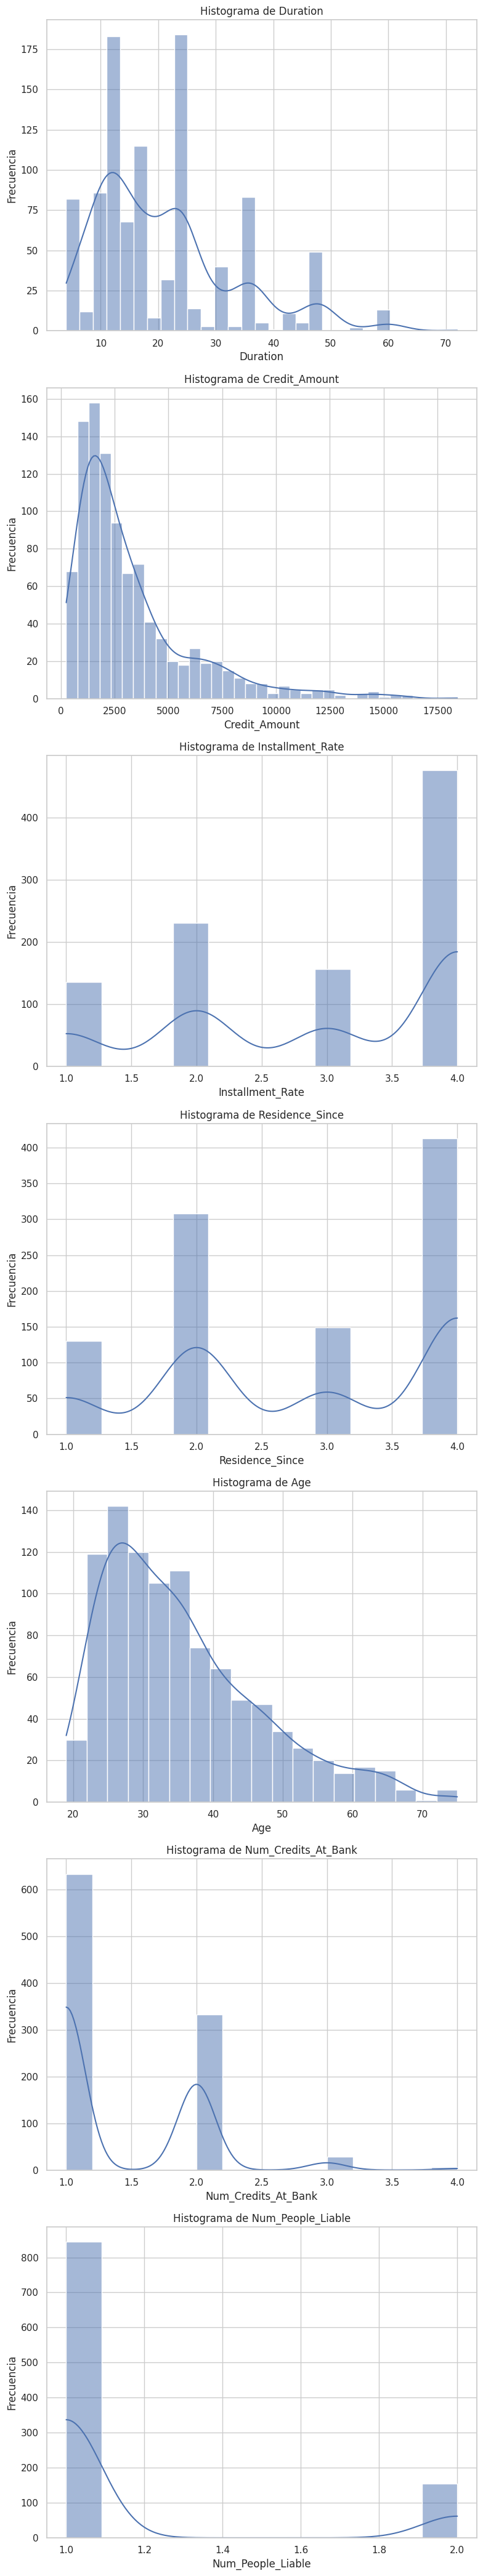

In [11]:
numeric_columns = [
    'Duration',
    'Credit_Amount',
    'Installment_Rate',
    'Residence_Since',
    'Age',
    'Num_Credits_At_Bank',
    'Num_People_Liable'
]
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(8, 6 * len(numeric_columns)))

for i, col in enumerate(numeric_columns):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Podemos observar:
* La mayoría de los créditos son por 12 o 24 meses. Existe una predisposición para los créditos de menos plazo aunque si los hay de plazos más largo (pero la distribución esta orientada más al lado izquierdo).
* El crédito promedio es por un monto de menos de 2,5000 DM (alrededor de 1,025 dólares).
* La distribución de las tasas de interés está inclinada hacia la derecha, con la mayoría de los registtros en 4%
* La mayoría de las personas tienen 4 años de residentes.
* La distribución para la edad, al igual que para las dos anteriores variables, esta inclinada hacia la izquierda. La media esta entre 20 y 30 años.
* La mayoría de las personas tienen uno o dos créditos en el banco (mucho más común tener uno solo).
* La mayoría de los casos tienen una sola persona responsable de los pagos.

Para los datos categóricos creamos gráficos de barras:

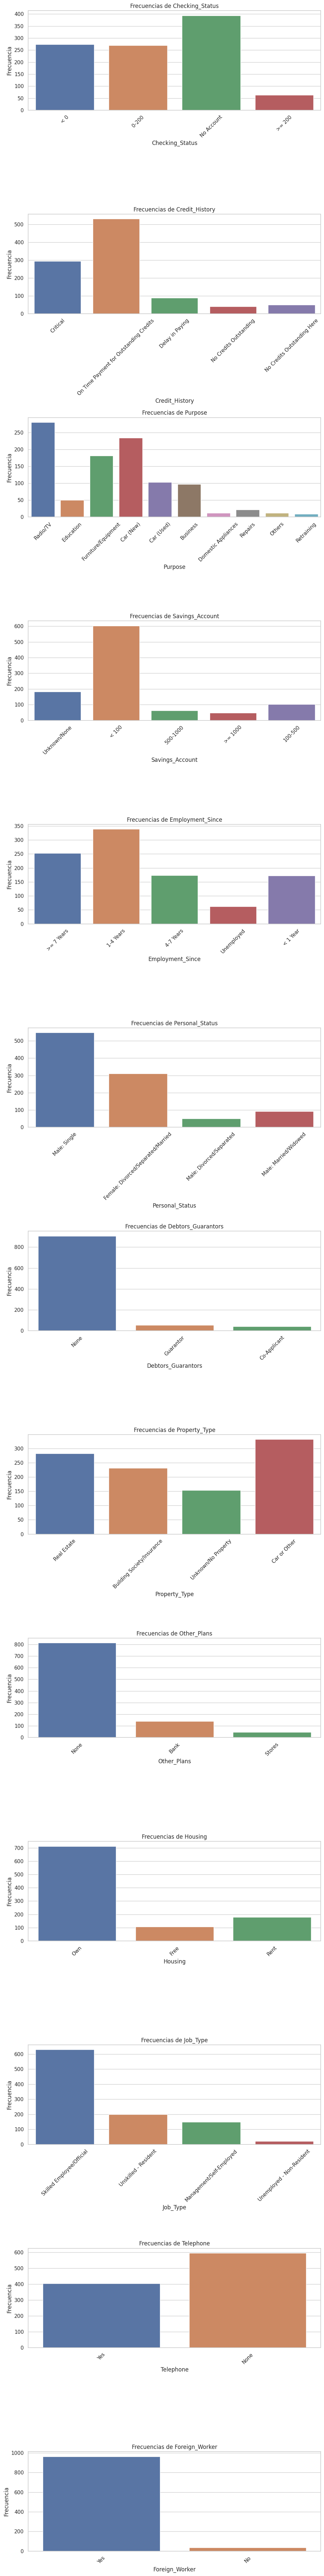

In [12]:
categorical_columns = [
    'Checking_Status',
    'Credit_History',
    'Purpose',
    'Savings_Account',
    'Employment_Since',
    'Personal_Status',
    'Debtors_Guarantors',
    'Property_Type',
    'Other_Plans',
    'Housing',
    'Job_Type',
    'Telephone',
    'Foreign_Worker'
]

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=len(categorical_columns),
                         ncols=1,
                         figsize=(10, 6 * len(categorical_columns)))

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Frecuencias de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Obtengamos las estadísticas descriptivas

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Credit_Amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Installment_Rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
Residence_Since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Num_Credits_At_Bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
Num_People_Liable,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0
Classification,1000.0,1.300,0.458487,1.0,1.0,1.0,2.00,2.0


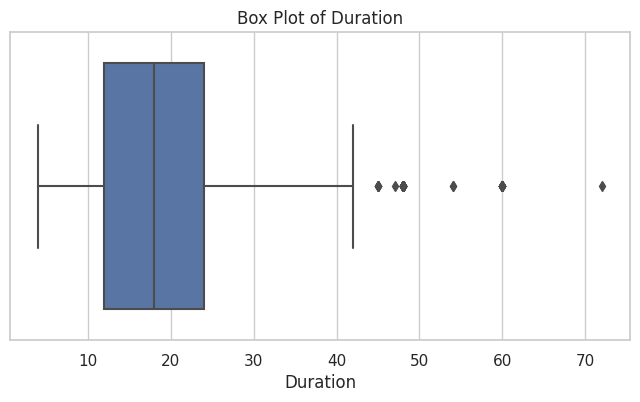

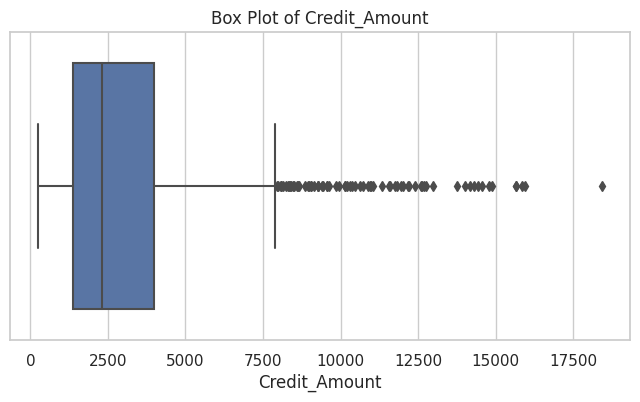

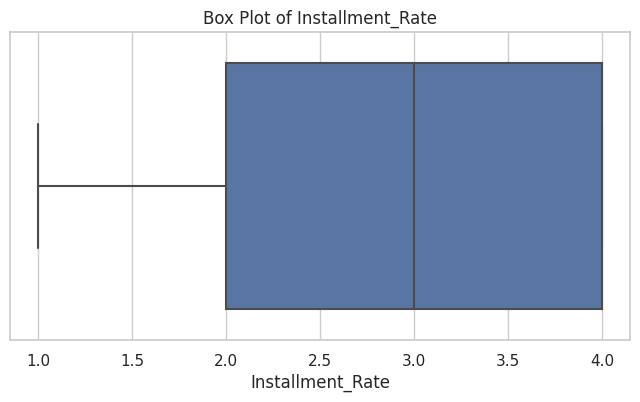

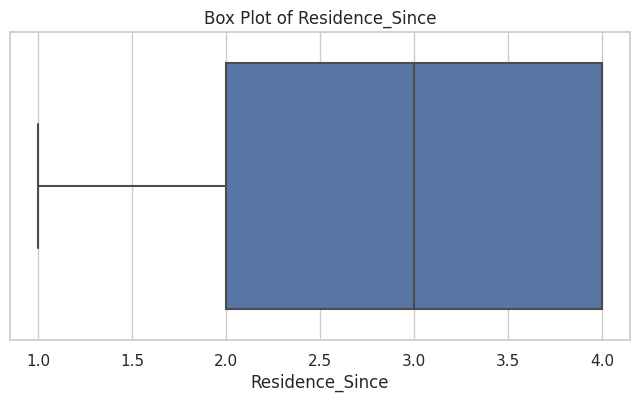

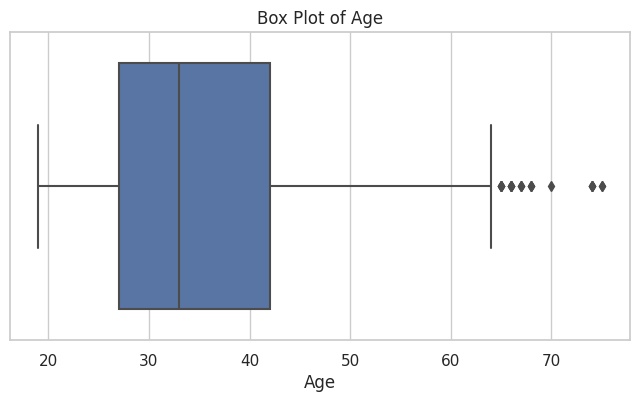

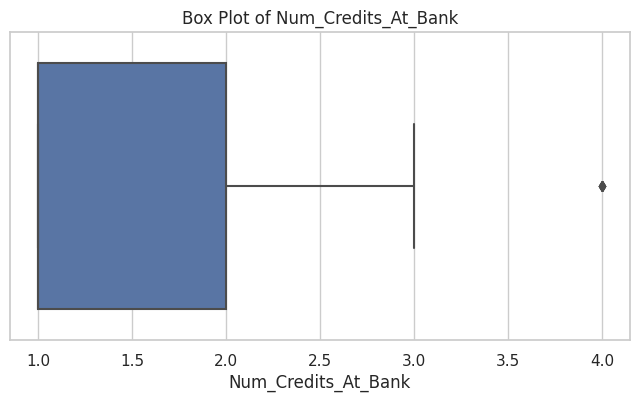

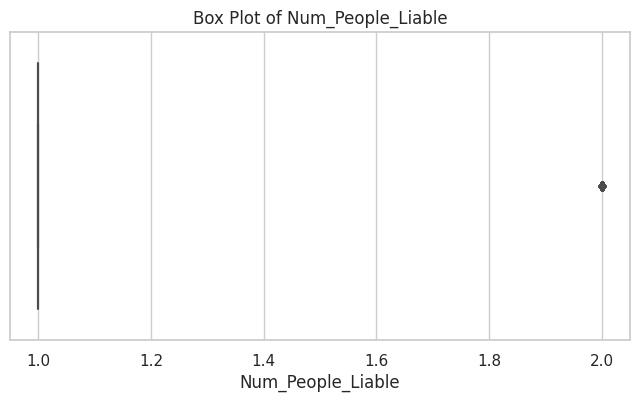

In [14]:
sns.set(style="whitegrid")
sns.set_context("notebook")

for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()


Observamos que las columnas numéricas no tienen muchos outliers que realmente afectarían. Adicionalmente, estos son valores probablemente reales. Sin embargo, quizás los outliers puedan afectar el ecalamiento. Utilizaremos *RobustScaler* en lugar de *StandardScaler* más adelante para minimizar el efecto de outliers.

Observemos la distribución de clasificación recordando que 1 significa bueno y 2 significa malo. Primero cambiaremos que 0 signifique malo para tener mayor claridad.

In [15]:
df['Classification'] = df['Classification'].replace(2, 0)

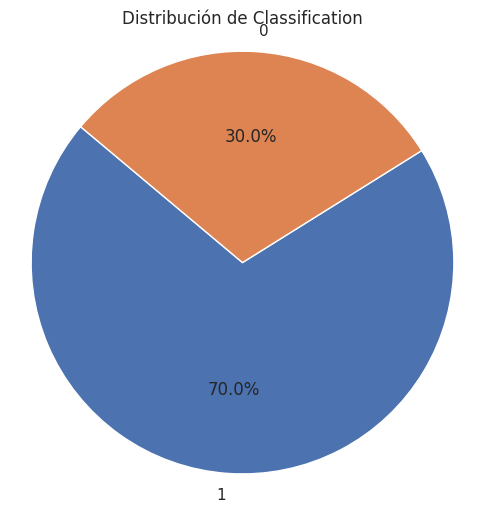

In [16]:
class_counts = df['Classification'].value_counts()

plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Classification')
plt.axis('equal')

plt.show()

Podemos ver que el dataset está desbalanceado, habiendo más del doble de filas con 1 en classification que 0. Es importante considerar esto para el entrenamiento.

Observaciones:
* Para el estado de la cuenta de cheques, lo más común es no tener, quizás esta variable no sea tan importante.
* Los dos casos más comunes de historial crediticio son pagos a tiempo en créditos actuales y estados de cuenta críticos (el peor caso posible).
* La mayoría de los créditos son para automoviles, TV/radios o muebles, lo cuál hace sentido con los montos de los créditos.
* La mayoría de las personas tienen entre 0 y 100 DM en su cuenta de ahorros. Considerando que los créditos son en promedio por 1,000 DM, quizás esta columna no sea indicativa de buenos deudores.
* El estatus de empleo más común es empleos con 1-4 años de antiguedad. El menos común es estar desempleado. Quizás sea útil crear una columna de empleado/desempleado en lugar de esta.
* La mayoría de las personas son hombres solteros. En segundo lugar son mujeres. Esta columna no parece ser muy útil.
* La gran mayoría de las personas no tienen a alguien como aval de su crédito. Quizás esto no sea indicativo de un buen o mal crédito.
* Muchas personas no tienen propiedad. El tipo de propiedad más común es un automóvil. En segundo lugar existen propiedades de bienes raíces. También es posible convertir esta columna a encoding binario (tiene o no tiene propiedad).
* La mayoría de las personas no tienen otros planes con mensualidades, ni en tiendas ni bancos.
* La mayoría de las personas son dueñas de su propio hogar.
* La mayoría de las personas son *Skilled Employee / Official*. Probablemente es más útil convertir esta columna en tiene/no tiene trabajo.
* No se tiene teléfono para la mayoría de las personas. La columna es de poca utilidad.
* La mayoría de las personas son trabajadores extranjeros. El porcentaje es tanto que probablemente no sea útil contar con esta columna.
* La mayoría (70%) de los casos corresponden a una buena clasificacion.

### Preprocesamiento de datos / Data Preprocessing

* Checking_Status: Cambiaremos por encoding label/ordinal ya que los incrementos son por la misma cantidad (200 DM)
* Credit_History: Cambiaremos por encoding binario (bueno = 1, malo = 0)
* Purpose: Cambiaremos por encoding binario (si es para educación o negocio = 1, si es para otra cosa = 0)
* Savings_Account: Eliminaremos la columna
* Employment_Since: Encoding binario (empleado = 1, desempleado = 0)
* Personal_Status: Eliminaremos la columna
* Debtors_Guarantors: Eliminaremos la columna
* Property_Type: Encoding binario (tiene propiedad = 1, no tiene propiedad = 0)
* Other_Plans: Eliminaremos la columna
* Housing: Cambiaremos por encoding binario (es dueño de su casa = 1, no es dueño de su casa = 0)
* Job_Type: *Cambiaremos la columna por encoding*
* Telephone: Eliminaremos la columna
* Foreign_Worker: Eliminaremos la columna

In [17]:
drop_cols = [
    'Savings_Account',
    'Personal_Status',
    'Debtors_Guarantors',
    'Other_Plans',
    'Telephone',
    'Foreign_Worker'
]

df.drop(drop_cols, axis = 1, inplace = True)

#### Encoding

Lidiar con columnas categóricas presenta una serie de decisiones necesarias, principalmente del *encoding* o codificación de los datos. Esto es aún más necesario cuando se considera el formato en que las columnas categóricas están.

Es necesario elegir un método de *encoding* para cada columna categórica, basado principalmente en si una columna es ordinal o nominal, además del modelo de aprendizaje automático que se usará.

In [18]:
# Checking_Status
df['Checking'] = [0 if x == 'No Account'
                 else 1 if x == '< 0'
                 else 2 if x == '0-200'
                 else 3
                 for x in df['Checking_Status']]

# Credit History
df['Good_History'] = [1 if x == 'On Time Payment for Outstanding Credits'
                      or x == 'No Credits Outstanding'
                      or x == 'No Credits Outstanding Here'
                      else 0
                      for x in df['Credit_History']]

# Purpose
df['Business_or_Education'] = [1 if x == 'Business'
                               or x == 'Education'
                               else 0
                               for x in df['Purpose']]

# Employment_Since
df['Unemployed'] = [1 if x == 'Unemployed'
                   else 0 for x in df['Employment_Since']]

# Propety_Type
df['Property_Owner'] = [1 if x != 'Unknown/No Property'
                   else 0 for x in df['Property_Type']]
# Housing
df['Owns_House'] = [1 if x == 'Own'
                   else 0 for x in df['Housing']]

# Job_Type
df = pd.get_dummies(df, columns = ['Job_Type'])

Eliminamos los originales de las nuevas columnas que acabamos de crear.

In [19]:
drop_cols = ['Checking_Status',
             'Credit_History',
             'Purpose',
             'Employment_Since',
             'Property_Type',
             'Housing'] # get_dummies() ya eliminó Job_Type

df.drop(drop_cols, axis = 1, inplace = True)

#### Escalamiento

Escalaremos los datos para hacer que

In [20]:
scaler = RobustScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

Observemos los datos escalados.

In [21]:
df.head()

,Duration,Credit_Amount,Installment_Rate,Residence_Since,Age,Num_Credits_At_Bank,Num_People_Liable,Classification,Checking,Good_History,Business_or_Education,Unemployed,Property_Owner,Owns_House,Job_Type_Management/Self-Employed,Job_Type_Skilled Employee/Official,Job_Type_Unemployed - Non-Resident,Job_Type_Unskilled - Resident
0,-1.0,-0.441354,0.5,0.5,2.266667,1.0,0.0,1,1,0,0,0,1,1,0,1,0,0
1,2.5,1.393114,-0.5,-0.5,-0.733333,0.0,0.0,0,2,1,0,0,1,1,0,1,0,0
2,-0.5,-0.085739,-0.5,0.0,1.066667,0.0,1.0,1,0,0,1,0,1,1,0,0,0,1
3,2.0,2.133883,-0.5,0.5,0.800000,0.0,1.0,1,1,1,0,0,1,0,0,1,0,0
4,0.5,0.978421,0.0,0.5,1.333333,1.0,1.0,0,1,0,0,0,0,0,0,1,0,0


### Exploración de datos: Análisis de correlación

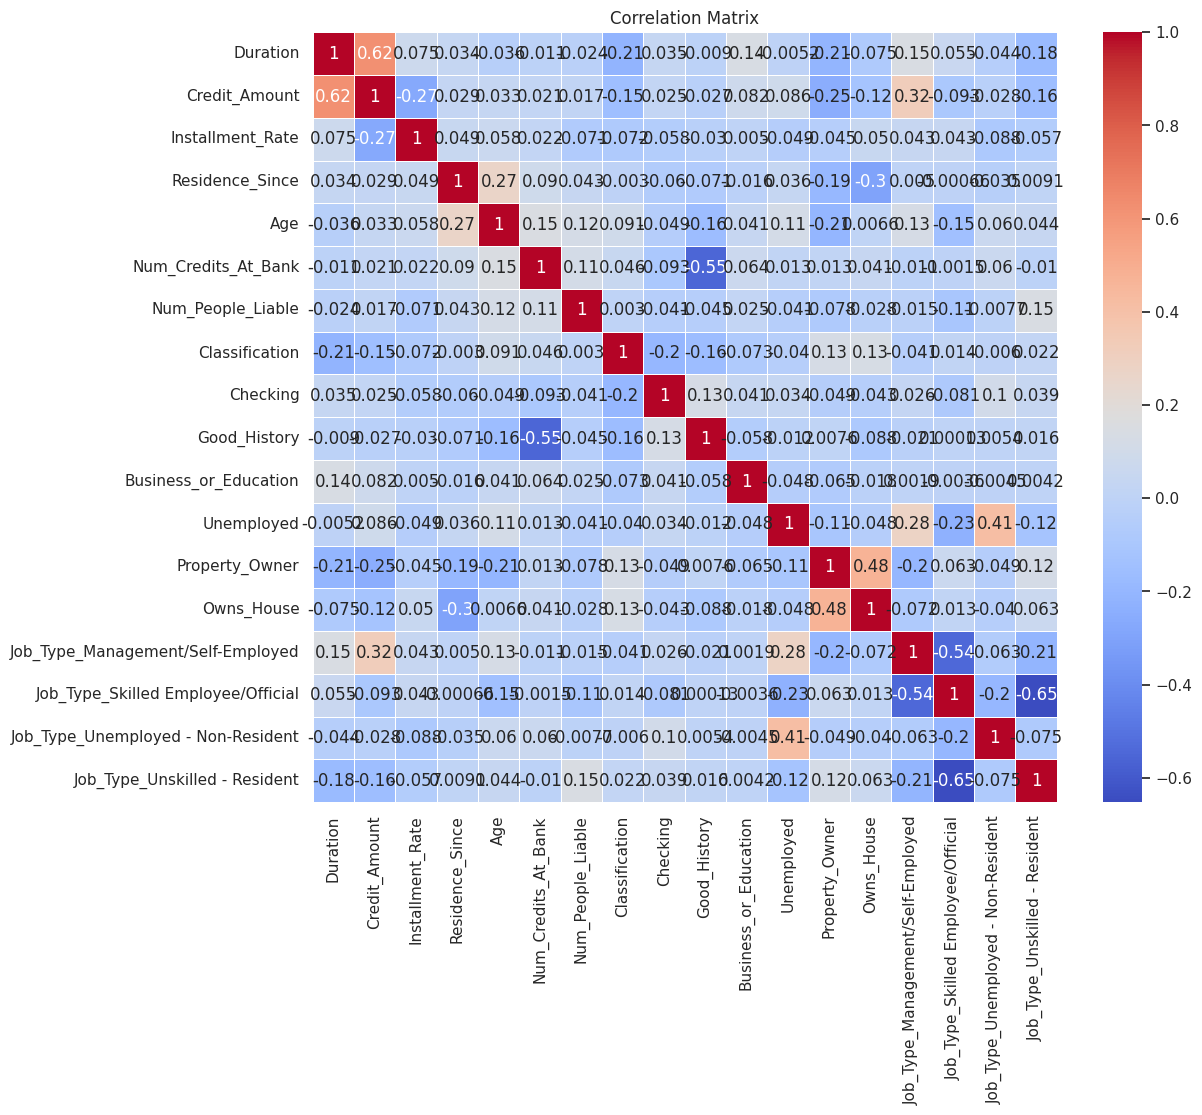

In [22]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Correlaciones notables:
* Credit amount y duration: Esto hace sentido ya que entre mayor sea el monto del crédito es más probable que el deudor desee plazos más largos para sus pagos.
* Good credit history y amount of credits at bank: Esto hace sentido ya que entre más cantidad de créditos mayor la oportunidad de no pagar a tiempo.
* Para todas las columnas de Job_Type con One Hot Encoding ignoramos las correlaciones. No existen muchas otras correlaciones notables.

## Machine Learning

### Selección de atributos / Feature Selection
Identificamos y seleccinoamos los atributos más relevantes. Utilizaremos un método de ANOVA (Analysis of Variance) ya que funciona bien con variables numéricas y categóricas al mismo tiempo.

In [23]:
X = df.drop('Classification', axis = 1)
y = df['Classification']

fs = SelectKBest(score_func=f_regression,k=17)

fit = fs.fit(X,y)

Visualizamos los features ordenados por F-Score.

In [24]:
features_score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score],axis=1)

feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(15,columns="F_Score"))

                        Input_Features    F_Score
0                             Duration  48.333790
7                             Checking  40.631200
8                         Good_History  27.278480
1                        Credit_Amount  24.482366
12                          Owns_House  18.411417
11                      Property_Owner  16.035010
4                                  Age   8.356995
9                Business_or_Education   5.396109
2                     Installment_Rate   5.259417
5                  Num_Credits_At_Bank   2.091652
13   Job_Type_Management/Self-Employed   1.644420
10                          Unemployed   1.584569
16       Job_Type_Unskilled - Resident   0.475465
14  Job_Type_Skilled Employee/Official   0.183523
15  Job_Type_Unemployed - Non-Resident   0.035342


Eliminaremos las columnas de Job_Type. Tienen poco valor y al ser el resultado de One Hot Encoding no permiten probar modelos basados en arboles.

In [25]:
drop_cols = [
    'Job_Type_Unskilled - Resident',
    'Job_Type_Skilled Employee/Official',
    'Job_Type_Unemployed - Non-Resident',
    'Job_Type_Management/Self-Employed'
]

df.drop(drop_cols, axis = 1, inplace = True)

### Construcción del modelo / Model Building

#### Test-Train Split
Dividimos los datos en conjuntos de entrenamiento y prueba

In [26]:
from sklearn.model_selection import train_test_split

X = df.drop('Classification', axis=1)
y = df['Classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Selección del modelo

Probaremos con algoritmos menos sensibles a imbalances en las clases ya que solo el 30% del dataset tiene clasificación de mal deudor. Utilizaremos:
* Random Forest Classifier
* Gradient Boosting Classifier (GBM)
* LightGBM
* XGBoost
* EasyEnsemble

Entrenamos los modelos base:

In [27]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'EasyEnsemble': EasyEnsembleClassifier(random_state=42)
}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    npv = tn / (tn + fn)
    specificity = tn / (tn + fp)

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'NPV': npv, # Negative Predictive Value
        'Specificity': specificity
    })


[LightGBM] [Info] Number of positive: 559, number of negative: 241
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698750 -> initscore=0.841353
[LightGBM] [Info] Start training from score 0.841353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

Visualizamos los resultados.

In [28]:
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,NPV,Specificity
0,Random Forest,0.765,0.786585,0.914894,0.845902,0.660837,0.666667,0.406780
1,Gradient Boosting,0.790,0.789474,0.957447,0.865385,0.673639,0.793103,0.389831
2,LightGBM,0.770,0.806452,0.886525,0.844595,0.689025,0.644444,0.491525
3,XGBoost,0.760,0.803922,0.872340,0.836735,0.681933,0.617021,0.491525
4,EasyEnsemble,0.660,0.828829,0.652482,0.730159,0.665224,0.449438,0.677966


Visualizaremos las métricas del rendimiento de los modelos.

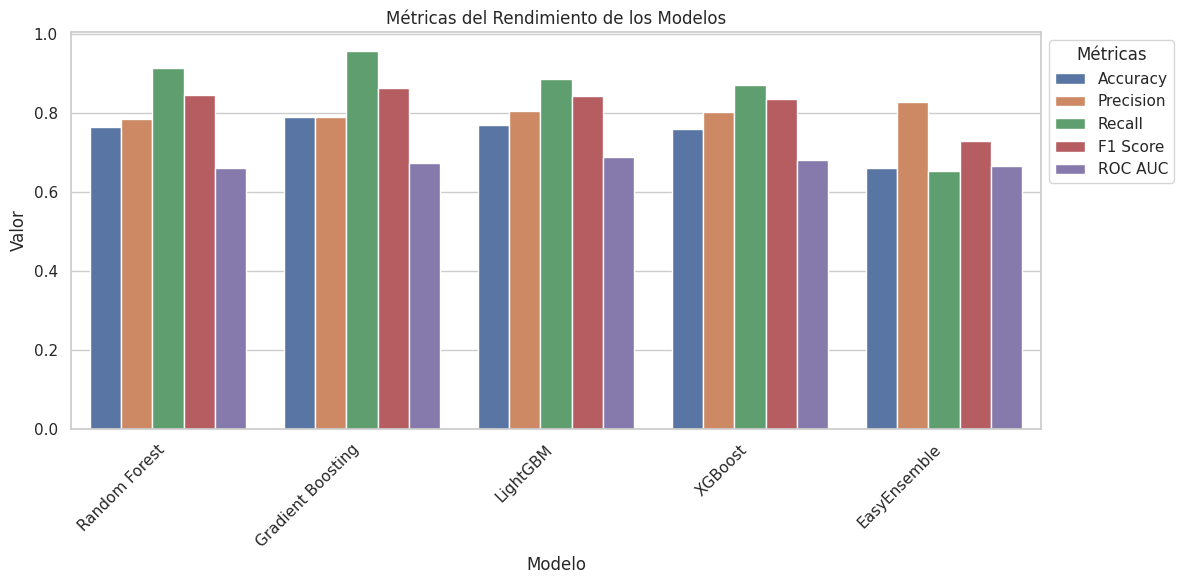

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

melted_df = results_df.melt(id_vars='Model', value_vars=metrics_to_plot, var_name='Metric')

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='value', hue='Metric', data=melted_df)
plt.title('Métricas del Rendimiento de los Modelos')
plt.xlabel('Modelo')
plt.ylabel('Valor')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Métricas', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


Dado que es mejor optimizar para identificar correctamente los malos deudores, optimizaremos para el valor predictivo negativo y accuracy.Tomando esto en cuenta el mejor modelo es Gradient Boosting. Lo afinaremos a continuación.

#### Afinación de hiperparámetros

In [ ]:
gb_classifier = GradientBoostingClassifier(random_state=42)

# Define hyperparameter grid for Grid Search with the top 6 hyperparameters
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.08],
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'subsample': [0.7, 0.8, 1.0],
}

# Create the Grid Search object
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the Grid Search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters on the test set
best_gb_classifier = grid_search.best_estimator_
accuracy = best_gb_classifier.score(X_test, y_test)
print("Test Accuracy with Best Hyperparameters:", accuracy)

#### Evaluación del modelo

##### Preparar k-Fold cross validation

Evaluaremos cada modelo usando el k-Fold cross validation. El k-Fold cross validation parte los datos en una cantidad _k_ de subconjuntos y evalúa al modelo entrenandolo con una cantidad _k-1_ de subconjuntos y se evalúa con el último subconjunto (Fold en inglés, de ahí el nombre). El proceso se repite _k_ veces, cada subcojunto tiene la oportunidad de ser el de prueba una vez.

Importar librería para realiar k-fold cross validation en todos nuestros modelos.

In [ ]:
from sklearn.model_selection import KFold
import statistics

Crear estructura de datos para almacenar las métricas.

In [ ]:
validation_results = {}

Matriz de confusión

#### Afinación de hiperparámetros / Hyperparameter tuning

### Resultados

## Conclusión